# handling the imbalanced data set

In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("CLEANED CREDIT DATA SET.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [4]:
X = df.drop("Class",axis = 1)
y= df["Class"]

In [5]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [6]:
y

0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64

In [7]:
X.shape,y.shape

((283726, 29), (283726,))

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f"Before SMOTE: {Counter(y)}")
print(f"After SMOTE: {Counter(y_res)}")

Before SMOTE: Counter({0: 283253, 1: 473})
After SMOTE: Counter({0: 283253, 1: 283253})


In [9]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = True)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((226980, 29), (56746, 29), (226980,), (56746,))

# LOGISTICREGRESSION

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [12]:
#modellling 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
# modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

# predication
ypred_train = log_model.predict(X_train)
print("train accuracy:",accuracy_score(y_train,ypred_train))


# cross validation score
from sklearn.model_selection import cross_val_score
print("cv score :",cross_val_score(log_model,X_train,y_train,cv =5,scoring ="accuracy").mean())


# predict & evaluation of the test data
ypred_test = log_model.predict(X_test)
print("test accuracy:",accuracy_score(y_test,ypred_test))
      


train accuracy: 0.9991585161688255
cv score : 0.9991585161688255
test accuracy: 0.9991188806259472


In [14]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

confusion_matrix: [[56643    16]
 [   34    53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.77      0.61      0.68        87

    accuracy                           1.00     56746
   macro avg       0.88      0.80      0.84     56746
weighted avg       1.00      1.00      1.00     56746



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

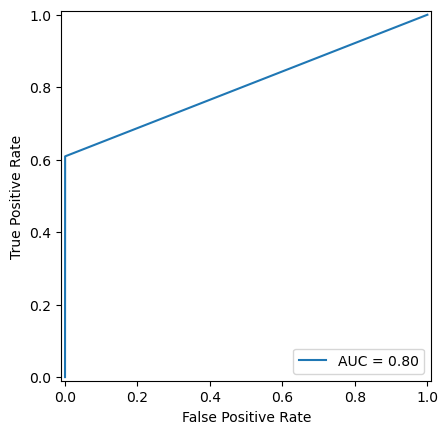

In [16]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc = roc_auc).plot()
plt.show()

# ANN

In [17]:
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
import tensorflow as tf
import keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
ann = Sequential()

In [21]:
ann.add(Dense(units = 6,kernel_initializer = "uniform",activation = "relu"))
ann.add(Dense(units =6,kernel_initializer = "uniform",activation = "relu" ))
ann.add(Dense(units = 1,kernel_initializer = "uniform",activation = "sigmoid"))
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [22]:
ann.fit(X_train_sc,y_train,epochs = 10,batch_size =32)

Epoch 1/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9969 - loss: 0.0922
Epoch 2/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 3/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9994 - loss: 0.0029
Epoch 4/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 5/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 6/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 7/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9995 - loss: 0.0028
Epoch 8/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 9/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 10/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9994 - loss: 0.0027


In [23]:
y_pred = ann.predict(X_train_sc)
y_pred_train = (y_pred > 0.5)
y_pred_a= ann.predict(X_test_sc)
y_pred_test = (y_pred_a > 0.5)

7094/7094 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [24]:
y_train.shape,y_test.shape,y_pred_train.shape,y_pred_test.shape

((226980,), (56746,), (226980, 1), (56746, 1))

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("train acccuracy:",accuracy_score(y_train,y_pred_train))
print("test accuracy:",accuracy_score(y_test,y_pred_test))
confusion_matrix(y_train,y_pred_train)

train acccuracy: 0.9994977531060005
test accuracy: 0.9994184612131252


array([[226546,     48],
       [    66,    320]], dtype=int64)

# hyper parameter tuning

In [26]:
def build_cross_classifier():
    classifier  = Sequential()
    classifier.add(Dense(units =6,kernel_initializer = "uniform",activation = "relu"))
    classifier.add(Dense(units =6,kernel_initializer = "uniform",activation = "relu"))
    classifier.add(Dense(units =1,kernel_initializer = "uniform",activation = "relu"))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier


In [27]:

from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(build_cross_classifier,batch_size = 32,epochs = 10)

In [28]:
classifier

KerasClassifier(
	model=<function build_cross_classifier at 0x000002D642F01B20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [29]:
estimator = KerasClassifier(build_cross_classifier())
param_grid = {"batch_size":[32],"epochs":[10,20],"optimizer":["adam","rmsprop"]}


In [30]:
from scikeras.wrappers import KerasClassifier
classifier = KerasClassifier(build_cross_classifier,batch_size = 32,epochs = 10)